In [174]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [175]:
df = pd.read_csv('./feigin2014_table1_mortality.csv')

In [199]:
df.columns

Index(['year', 'age_group', 'income_group', 'mortality_rate', 'interval_low',
       'interval_high'],
      dtype='object')

In [250]:
def make_plot(income_level, ax):
    x = np.arange(3)  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    income_df = df[df['income_group'] == income_level]
    # fig, ax = plt.subplots(layout='constrained')
    years = list(income_df['year'].unique())
    for year in years:
        y_vals = income_df[income_df['year']==year]
        
        relative_low = y_vals['mortality_rate'] - y_vals['interval_low']
        relative_high = y_vals['interval_high'] - y_vals['mortality_rate']
        
        span:pd.Series = relative_high - relative_low
        span = span.abs().round(3)

        y_err = [list(relative_low), list(relative_high)]

        offset = width * multiplier
        rects = ax.bar(x + offset, y_vals['mortality_rate'], width, label=str(year), yerr=y_err)
        # plt.errorbar(x + offset, y_vals['mortality_rate'], yerr=[50, 100])
        # print(rects)
        ax.bar_label(rects, labels=span,padding=3)
        multiplier += 1
    
    ax.set_title("Income = " + income_level)
    ax.set_xticks(x + width, income_df['age_group'].astype(str).unique())
    ax.set_ylim(0, 2600)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
        
    if income_level != "high":
        ax.set_yticklabels([])
        ax.set_yticks([])
        ax.spines['left'].set_visible(False)
        
    return ax

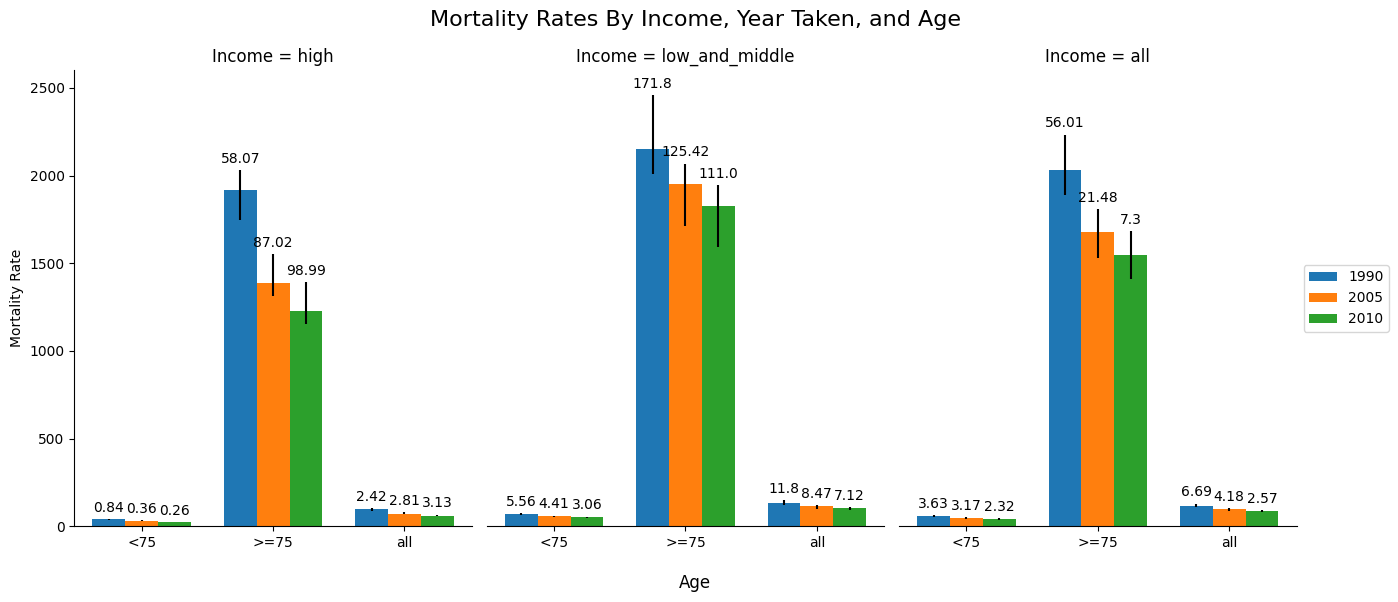

In [251]:
incomes = list(df['income_group'].unique())
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
plots = [make_plot(income, ax) for income, ax in zip(incomes, axs)]
axs[0].set_ylabel('Mortality Rate')
axs[-1].legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

plt.subplots_adjust(wspace=0)  
fig.suptitle('Mortality Rates By Income, Year Taken, and Age', fontsize=16)
fig.supxlabel('Age')
fig.tight_layout()
plt.show()